## pip install

In [1]:
%pip install nb-black
%pip install plotly
%pip install torchtext
%load_ext autoreload
%autoreload 2
%load_ext lab_black
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import torch
import sys
import pickle
import torchtext
from sklearn.manifold import TSNE
import plotly.graph_objects as go

sys.path.append("../")

## Loading Model and Vocabulary

In [3]:
folder = "weights/skipgram_WikiText2"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.load(f"../{folder}/model.pt", map_location=device)

#vocab = torch.load(f"../{folder}/vocab.pt")

####non ho le frequenze le devo importare#####

with open('/home/fmollica/Downloads/infos.pickle', 'rb') as handle:
    infos = pickle.load(handle)
    word_frequency_vocab=infos["word_frequency_vocab"]
    word2id=infos["word2id"]
    id2word=infos["id2word"]


word_frequency_vocab = {k: v for k, v in sorted(word_frequency_vocab.items(), key=lambda item: item[1], reverse=True)}

vocab = torchtext.vocab.vocab(word_frequency_vocab)

AllenNLP not available. Registrable won't work.


In [4]:
model.eval()

BoxModel(
  (embeddings_word): BoxEmbedding(8297, 40)
  (embeddings_context): BoxEmbedding(8297, 40)
  (box_vol): Volume()
  (box_int): Intersection()
)

## N Volumi più grandi e piccoli dello spazio target e context

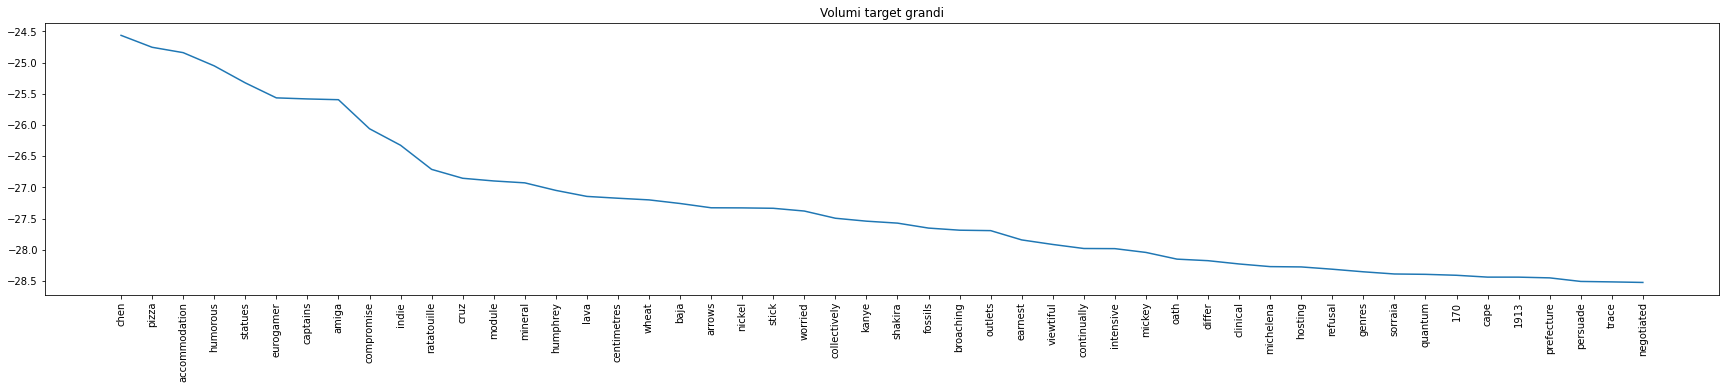

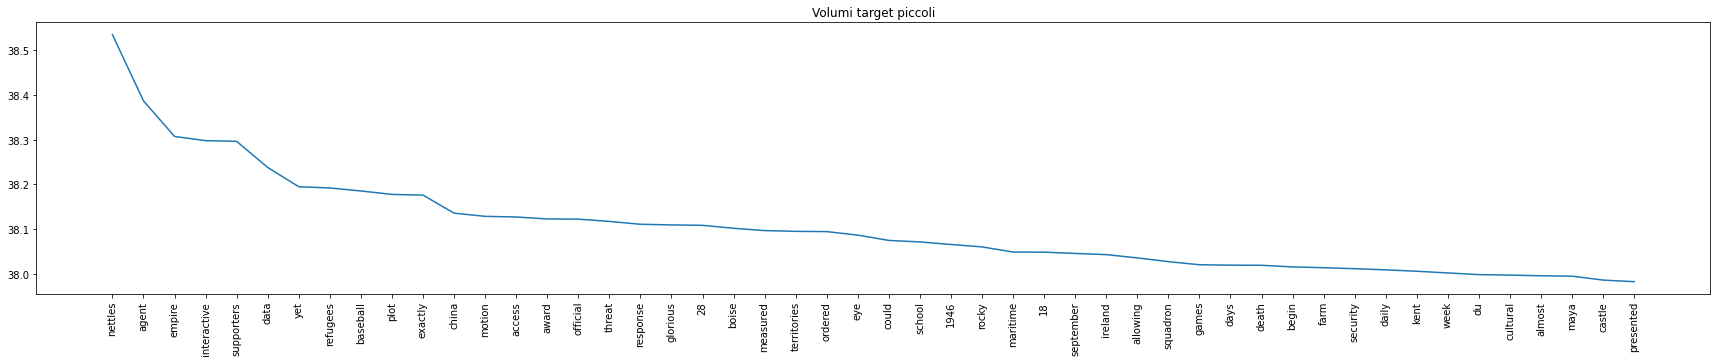

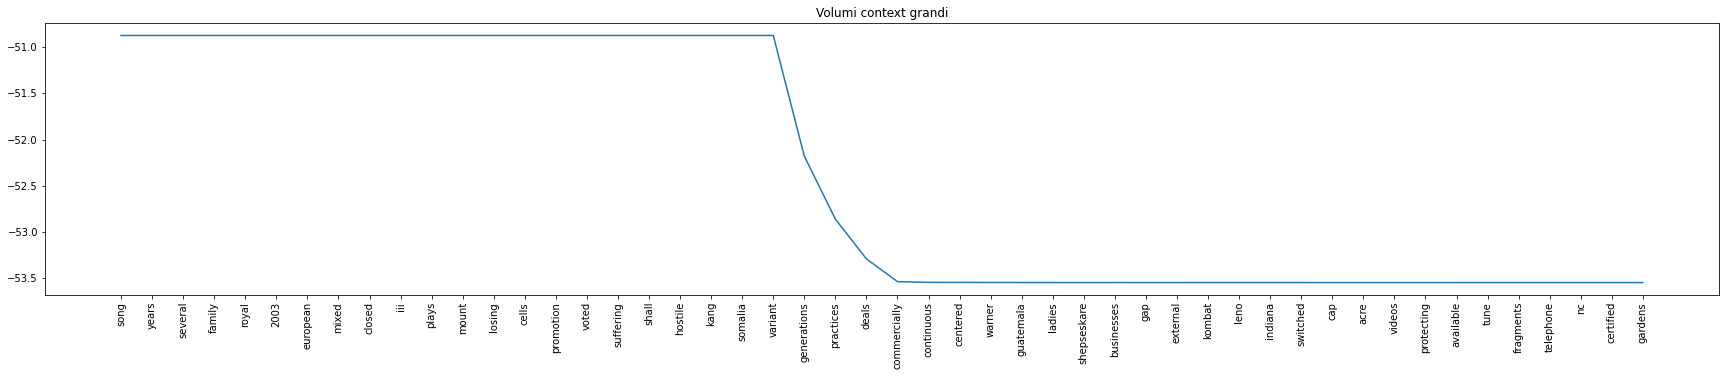

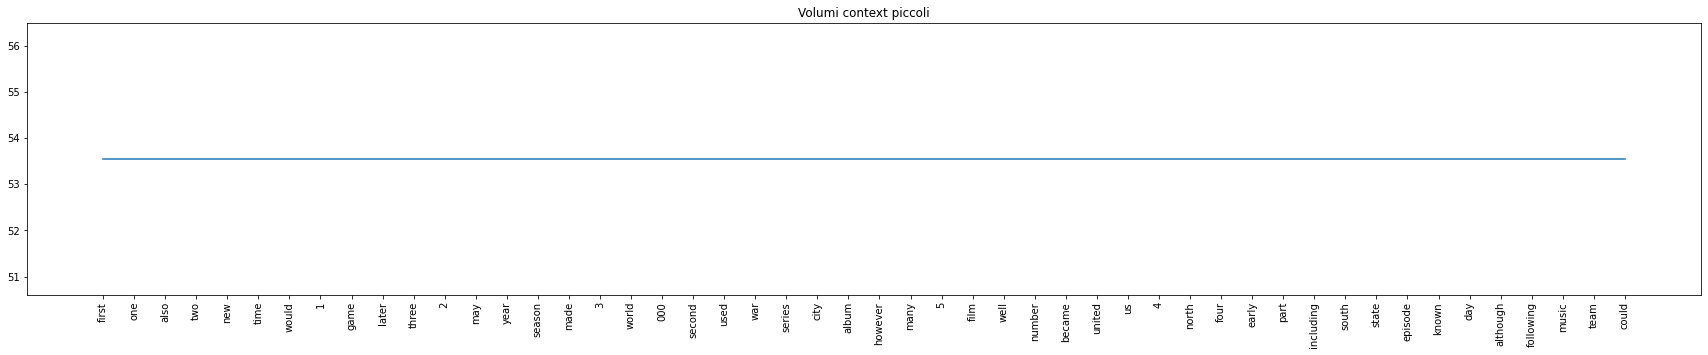

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact
from copy import copy
import matplotlib._color_data as mcd


def print_volumes(volumes, N, title):
    idx = (-volumes).argsort()
    words_ = []
    words_frequency_ = []
    volumes_ = []
    for i, index in enumerate(idx.tolist()[0:N]):
        words_.append(vocab.lookup_token(index))
        words_frequency_.append(word_frequency_vocab[vocab.lookup_token(index)])
        volumes_.append(volumes[index].item())

    fig, ax = plt.subplots(figsize=(30, 5))
    plt.xticks(rotation=90)
    ax.set_title(title)
    ax.plot(words_, volumes_)


N = 50
box_vol = model.box_vol
box_int = model.box_int

###### TARGET VOLUME GRANDI ########
volumes_target = box_vol(model.embeddings_word.all_boxes)
print_volumes(volumes_target, N, "Volumi target grandi")
###### TARGET VOLUME PICCOLI ########
volumes_target = box_vol(model.embeddings_word.all_boxes)
print_volumes(-volumes_target, N, "Volumi target piccoli")
###### CONTEXT VOLUMI GRANDI #########
volumes_context = box_vol(model.embeddings_context.all_boxes)
print_volumes(volumes_context, N, "Volumi context grandi")
###### CONTEXT VOLUMI PICCOLI #########
volumes_context = box_vol(model.embeddings_context.all_boxes)
print_volumes(-volumes_context, N, "Volumi context piccoli")

## Volumi N parole più frequenti e meno frequenti dello spazio target e context

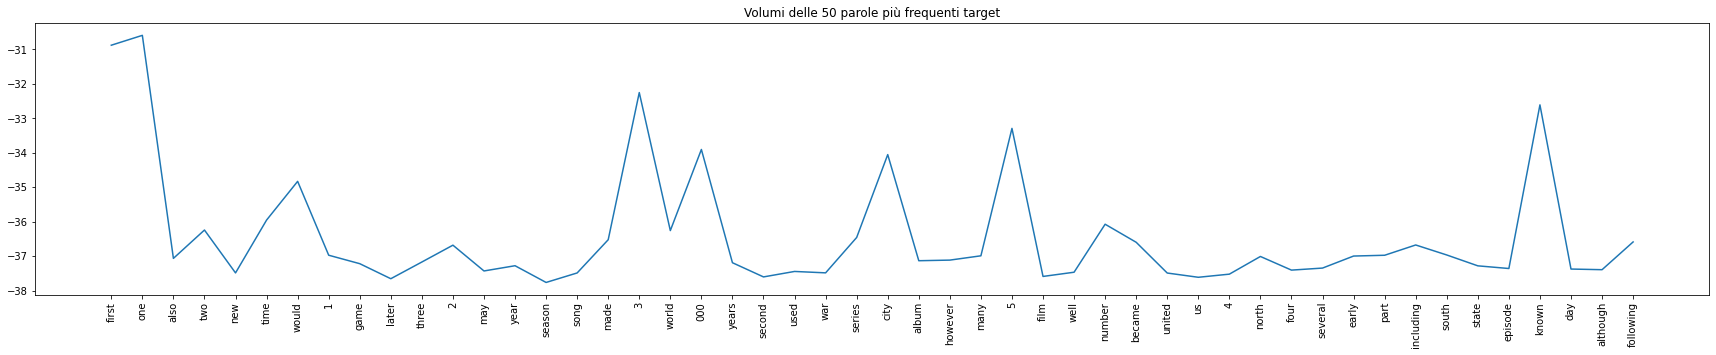

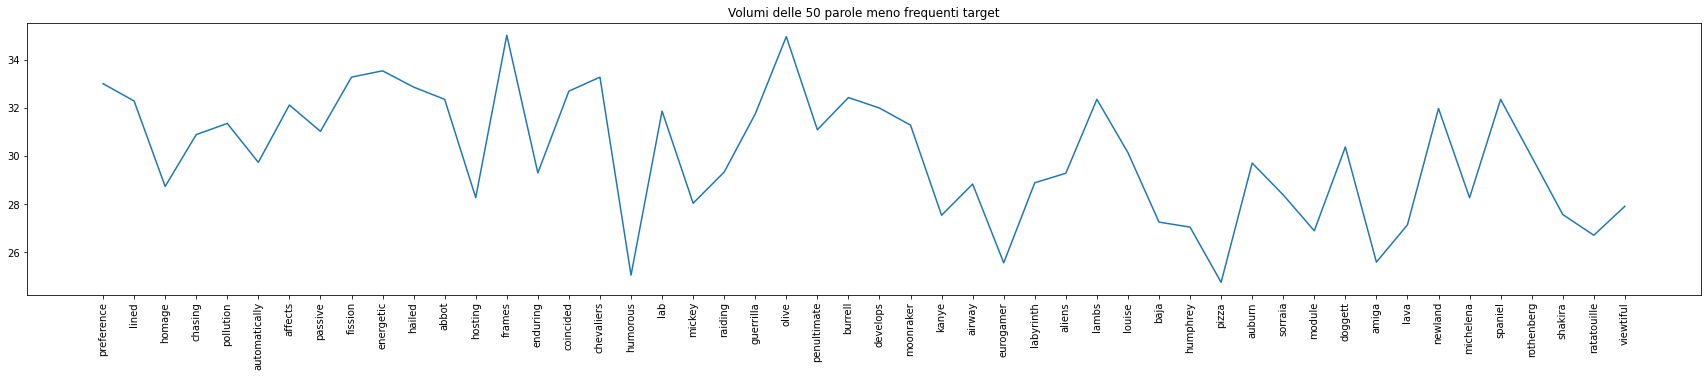

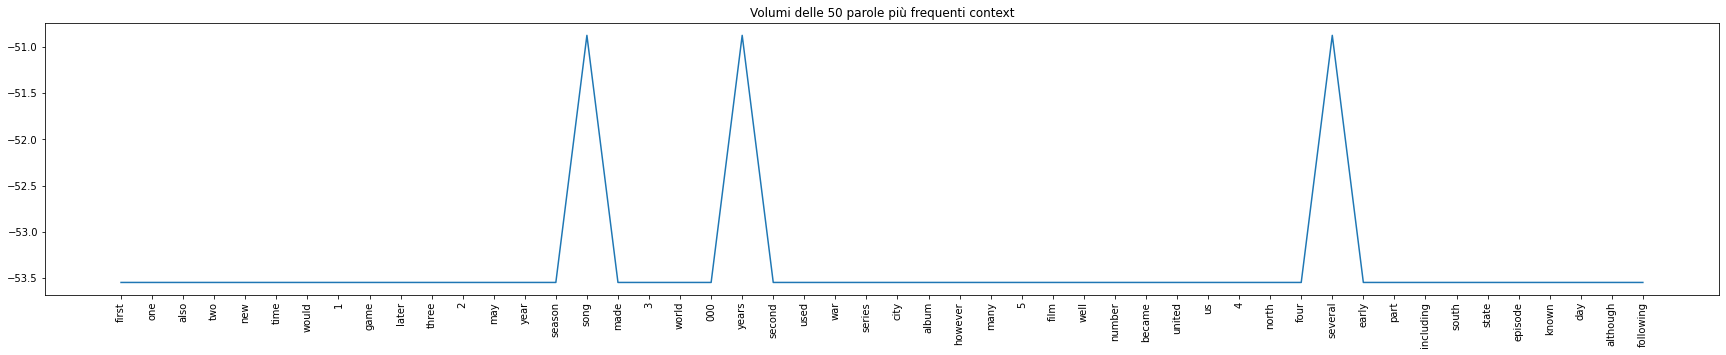

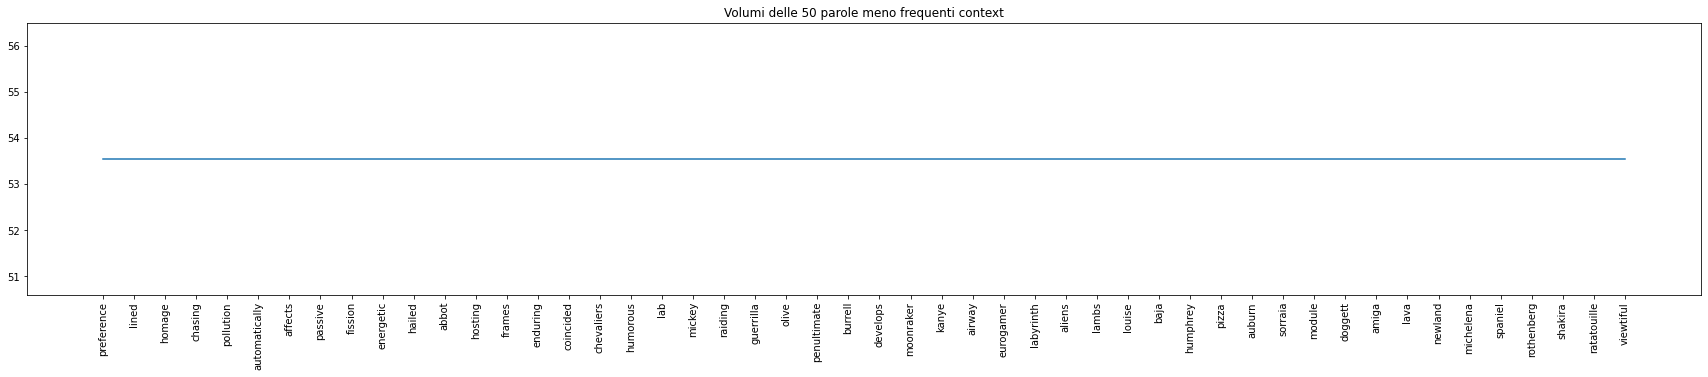

In [24]:
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, interactive
from copy import copy
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch


###prendere parole più frequenti####


def print_volumes(volumes, list_words, title):
    words_ = []
    words_frequency_ = []
    volumes_ = []
    for i, word in enumerate(list_words):
        words_.append(word)
        words_frequency_.append(word_frequency_vocab[word])
        volumes_.append(volumes[vocab.lookup_indices([word])[0]].item())

    fig, ax = plt.subplots(figsize=(30, 5))
    plt.xticks(rotation=90)
    ax.set_title(title)
    ax.plot(words_, volumes_)


N = 50

#####le frequenze nel vocab sono già in ordine#####
list_higher_frequency_words = []

for i, tuple in enumerate(list(word_frequency_vocab.items())[0:N]):
    list_higher_frequency_words.append(tuple[0])

list_lowest_frequency_words = []

for i, tuple in enumerate(list(word_frequency_vocab.items())[-N:]):
    list_lowest_frequency_words.append(tuple[0])

###### TARGET VOLUMI N PAROLE FREQUENTI ########
volumes_target = box_vol(model.embeddings_word.all_boxes)
print_volumes(volumes_target, list_higher_frequency_words, "Volumi delle " + str(N) + " parole più frequenti target")
###### TARGET VOLUMI N PAROLE MENO FREQUENTI ########
volumes_target = box_vol(model.embeddings_word.all_boxes)
print_volumes(-volumes_target, list_lowest_frequency_words, "Volumi delle " + str(N) + " parole meno frequenti target")
###### CONTEXT VOLUMI N PAROLE FREQUENTI #########
volumes_context = box_vol(model.embeddings_context.all_boxes)
print_volumes(volumes_context, list_higher_frequency_words, "Volumi delle " + str(N) + " parole più frequenti context")
###### CONTEXT VOLUMI N PAROLE MENO FREQUENTI #########
volumes_context = box_vol(model.embeddings_context.all_boxes)
print_volumes(-volumes_context, list_lowest_frequency_words, "Volumi delle " + str(N) + " parole meno frequenti context")

## Grafico distribuzione frequenza parole

<AxesSubplot:xlabel='frequency', ylabel='Count'>

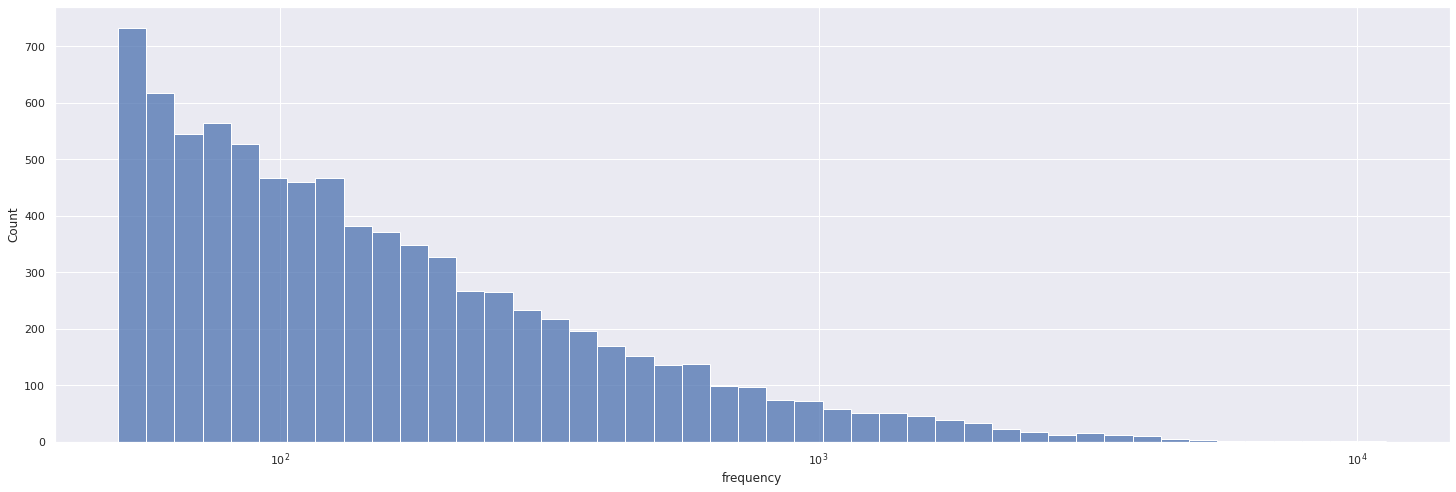

In [37]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(25,8)})

data = {"frequency": list(word_frequency_vocab.values())}
sns.histplot(data=data, x="frequency", log_scale=True)

## calcolo quantili

In [41]:
quantile = np.arange(0.0, 1.0, 0.1)
for i in quantile:
    print(np.quantile(list(word_frequency_vocab.values()),i))

50.0
58.0
68.0
81.0
100.0
124.0
159.0
213.0
316.0
571.0


## wordcloud dataset

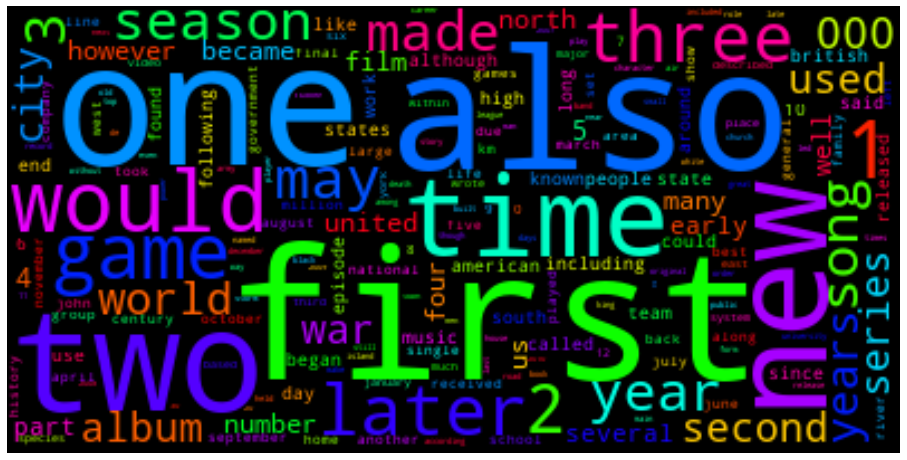

In [39]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80, colormap="hsv").generate_from_frequencies(word_frequency_vocab)
plt.figure(figsize=(16, 12))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Getting Embeddings

In [4]:
# embedding from first model layer
embeddings = list(model.parameters())[0]
embeddings = embeddings.cpu().detach().numpy()

# normalization
norms = (embeddings ** 2).sum(axis=1) ** (1 / 2)
norms = np.reshape(norms, (len(norms), 1))
embeddings_norm = embeddings / norms
embeddings_norm.shape

(4099, 10)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from ipywidgets import interact, interactive
from copy import copy
import matplotlib._color_data as mcd
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
colors = [name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS]

list_entire = []
for i,elem in enumerate(myboxes):
  list_epoch = []
  for i, box in enumerate(elem):
    #print(box)
    rect = patches.Rectangle((box[0][0], box[0][1]), 
                            box[1][0] - box[0][0], 
                            box[1][1] - box[0][1], 
                            facecolor=colors[i], edgecolor = colors[i], lw=3, label=w2v.data.id2word[i], alpha=0.1)
    list_epoch.append(rect)
  list_entire.append(list_epoch)

def f2(epoch = (0, int(w2v.batch_count)-1, 1)):

    fig, ax = plt.subplots(figsize=(30, 10))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    #plt.plot([0.5, 0.5], [0, 4], 'k-', lw=2)
    for i,rectangle in enumerate(list_entire[epoch]):
      new_c=copy(rectangle)
      rx, ry = new_c.get_xy()
      cx = rx + new_c.get_width()/2.0
      cy = ry + new_c.get_height()/2.0
      ax.annotate(w2v.data.id2word[i], (cx, cy), color='black', fontsize=10, ha='center', va='center')
      ax.add_patch(new_c)
    #ax.legend()

interact(f2);

# Visualization with t-SNE

In [22]:
# get embeddings
embeddings_df = pd.DataFrame(embeddings)

# t-SNE transform
tsne = TSNE(n_components=2)
embeddings_df_trans = tsne.fit_transform(embeddings_df)
embeddings_df_trans = pd.DataFrame(embeddings_df_trans)

# get token order
embeddings_df_trans.index = vocab.itos

# if token is a number
is_numeric = embeddings_df_trans.index.str.isnumeric()

/home/fmollica/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/fmollica/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [24]:
color = np.where(is_numeric, "green", "black")
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=embeddings_df_trans[0],
        y=embeddings_df_trans[1],
        mode="text",
        text=embeddings_df_trans.index,
        textposition="middle center",
        textfont=dict(color=color),
    )
)
fig.write_html("../word2vec_visualization.html")

# Find Similar Words

In [7]:
def get_top_similar(word: str, topN: int = 10):
    word_id = vocab[word]
    if word_id == 0:
        print("Out of vocabulary word")
        return

    word_vec = embeddings_norm[word_id]
    word_vec = np.reshape(word_vec, (len(word_vec), 1))
    dists = np.matmul(embeddings_norm, word_vec).flatten()
    topN_ids = np.argsort(-dists)[1 : topN + 1]

    topN_dict = {}
    for sim_word_id in topN_ids:
        sim_word = vocab.lookup_token(sim_word_id)
        topN_dict[sim_word] = dists[sim_word_id]
    return topN_dict

In [9]:
for word, sim in get_top_similar("germany").items():
    print("{}: {:.3f}".format(word, sim))

italy: 0.677
netherlands: 0.569
france: 0.551
1917: 0.515
ireland: 0.489
poland: 0.469
britain: 0.467
1918: 0.462
spain: 0.460
november: 0.445


# Vector Equations

In [10]:
emb1 = embeddings[vocab["king"]]
emb2 = embeddings[vocab["man"]]
emb3 = embeddings[vocab["woman"]]

emb4 = emb1 - emb2 + emb3
emb4_norm = (emb4 ** 2).sum() ** (1 / 2)
emb4 = emb4 / emb4_norm

emb4 = np.reshape(emb4, (len(emb4), 1))
dists = np.matmul(embeddings_norm, emb4).flatten()

top5 = np.argsort(-dists)[:5]

for word_id in top5:
    print("{}: {:.3f}".format(vocab.lookup_token(word_id), dists[word_id]))

king: 0.707
son: 0.442
reign: 0.434
lord: 0.420
woman: 0.409
